In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage import io
from skimage.feature import hog

In [31]:
##IMPORTING DATA
train_dir = "fer2013/train/"
test_dir = "fer2013/test/"

train_dataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                               horizontal_flip=True,
                                                               validation_split=0.2)
training_data = train_dataGenerator.flow_from_directory(train_dir,
                                                        batch_size=64,
                                                        target_size=(48,48),
                                                        color_mode="grayscale", 
                                                        shuffle=True,
                                                        class_mode='categorical',
                                                        subset='training')
validation_data = train_dataGenerator.flow_from_directory(train_dir,
                                                        batch_size=64,
                                                        target_size=(48,48),
                                                        color_mode="grayscale", 
                                                        shuffle=True,
                                                        class_mode='categorical',
                                                        subset='validation')

test_dataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                              horizontal_flip=True)
test_data = test_dataGenerator.flow_from_directory(test_dir,
                                                  batch_size=64,
                                                  target_size=(48,48),
                                                  color_mode="grayscale",
                                                  shuffle=True,
                                                  class_mode="categorical")

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
##MODEL
def create_model():
    weight_decay = 1e-4
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(64, (4, 4), padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay), input_shape=(48, 48, 1)))
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(64, (4, 4), padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.2))

    model.add(tf.keras.layers.Conv2D(128, (4, 4), padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.3))
    
    model.add(tf.keras.layers.Conv2D(128, (4, 4), padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(128, (4, 4), padding='same', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation="linear"))
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.Dense(7, activation='softmax'))
    
    return model

In [5]:
model = create_model()

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0003), metrics=["accuracy"])

2023-06-23 13:04:34.898599: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-23 13:04:34.898947: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Max


In [7]:
checkpointer = [tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', verbose = 1, restore_best_weights=True, mode="max",patience = 10),
                tf.keras.callbacks.ModelCheckpoint(
                    filepath='final_model_weights.hdf5',
                    monitor="val_accuracy",
                    verbose=1,
                    save_best_only=True,
                    mode="max")]

In [9]:
steps_per_epoch = training_data.n // training_data.batch_size
validation_steps = validation_data.n // validation_data.batch_size

In [10]:
history = model.fit(x=training_data,
                   validation_data=validation_data,
                   epochs=50,
                   steps_per_epoch=steps_per_epoch,
                   validation_steps=validation_steps)

Epoch 1/50


2023-06-23 13:15:42.263539: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-06-23 13:15:42.576732: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


357/358 [============================>.] - ETA: 0s - loss: 1.8001 - accuracy: 0.3141

2023-06-23 13:15:59.738100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


358/358 [==============================] - 19s 39ms/step - loss: 1.7996 - accuracy: 0.3142 - val_loss: 1.9002 - val_accuracy: 0.2330
Epoch 2/50
358/358 [==============================] - 13s 36ms/step - loss: 1.5406 - accuracy: 0.4180 - val_loss: 1.4754 - val_accuracy: 0.4445
Epoch 3/50
358/358 [==============================] - 14s 38ms/step - loss: 1.4169 - accuracy: 0.4698 - val_loss: 1.3597 - val_accuracy: 0.4872
Epoch 4/50
358/358 [==============================] - 13s 37ms/step - loss: 1.3250 - accuracy: 0.5089 - val_loss: 1.2935 - val_accuracy: 0.5214
Epoch 5/50
358/358 [==============================] - 13s 37ms/step - loss: 1.2529 - accuracy: 0.5402 - val_loss: 1.2622 - val_accuracy: 0.5307
Epoch 6/50
358/358 [==============================] - 13s 36ms/step - loss: 1.2066 - accuracy: 0.5582 - val_loss: 1.3190 - val_accuracy: 0.5114
Epoch 7/50
358/358 [==============================] - 13s 36ms/step - loss: 1.1644 - accuracy: 0.5785 - val_loss: 1.1859 - val_accuracy: 0.5690
Epo

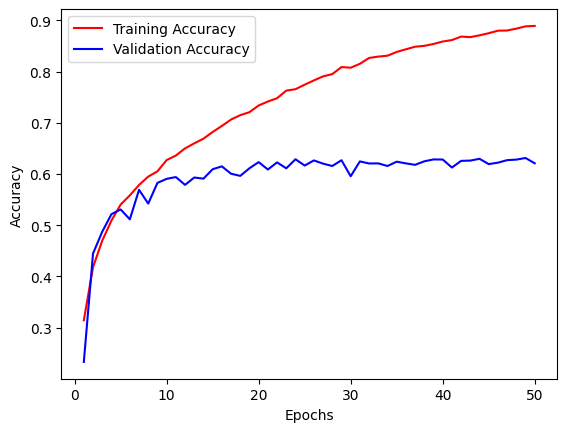

In [14]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
epoch_count = range(1, len(accuracy) + 1)

plt.plot(epoch_count, accuracy, "r")
plt.plot(epoch_count, val_accuracy, "b", )
plt.legend(["Training Accuracy", "Validation Accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [17]:
test_accuracy = model.evaluate(test_data, batch_size=test_data.batch_size, steps=test_data.n//test_data.batch_size)
printf("Pure CNN", test_accuracy[1]*100)

112/112 [==============================] - 1s 13ms/step - loss: 1.5926 - accuracy: 0.6251


62.51395344734192

In [18]:
##IMPLEMENTING HOG

In [38]:
def hog(directory_iterator):
    hog_features, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                     cells_per_block=(1, 1), visualize=True, channel_axis=-1)
    yield hog_features